In [27]:
#ORF 435, Final Project Sharpe Nicholas Kim
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.optimize import linprog
#from cvxpy import *
from math import log
import matplotlib.pyplot as plt
#dfScenarios = df.iloc[0:2000]

In [28]:
df = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\scenarioSImulationData_HW8.csv')

In [72]:
means = list(dfScenarios.describe().iloc[1])[0:6] + [dfScenarios.describe().iloc[1][6]]
for i in range(len(means)):
    means[i] += 1

In [66]:
scenarioList1D = dfScenarios.drop([" Inflation", " Regime"], axis = 1)
scenarioList1D = scenarioList1D + 1

In [67]:
scenarioList1D.head()

,US Equity,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities,Cash
0,0.981373,1.010159,0.978138,1.004202,0.996087,1.022663,1.001907
1,1.111141,0.994120,1.052264,1.004902,1.121195,1.017897,1.002265
2,0.967987,1.033060,1.038651,1.039694,1.031615,0.980027,1.002104
3,1.014385,1.002912,1.033654,1.022533,0.967633,1.052268,1.001920
4,0.987917,0.995427,0.981208,0.981283,0.982228,0.976434,1.001381


In [68]:
scenarioList1D = list(scenarioList1D.values)

0.002
     fun: 7.454796747115727e-05
     jac: array([2.40222153e-04, 1.78537011e-04, 2.52619800e-04, 2.51307044e-04,
       3.55152161e-04, 2.34003337e-05, 3.89200068e-08])
 message: 'Optimization terminated successfully.'
    nfev: 99
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.00000000e+00, 2.95794647e-01, 1.42746758e-01, 2.39597196e-01,
       6.07153217e-18, 0.00000000e+00, 3.21861398e-01])

0.0022500000000000003
     fun: 7.454796747115727e-05
     jac: array([2.40222153e-04, 1.78537011e-04, 2.52619800e-04, 2.51307044e-04,
       3.55152161e-04, 2.34003337e-05, 3.89200068e-08])
 message: 'Optimization terminated successfully.'
    nfev: 99
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.00000000e+00, 2.95794647e-01, 1.42746758e-01, 2.39597196e-01,
       6.07153217e-18, 0.00000000e+00, 3.21861398e-01])

0.0025000000000000005
     fun: 7.454796747115727e-05
     jac: array([2.40222153e-04, 1.78537011e-04, 2.52619800e-04, 2.51307

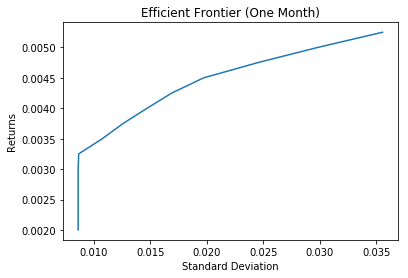

In [75]:
returnGoal = 0.005
def Var(x):
    xT = np.transpose(x)
    res = np.matmul(scenarioList1D[0:2000], xT)
    return np.var(res)

# Sum to 1
def constraint1(x):
    sum = 1
    for i in range(7):
        sum -= x[i]
    return sum

# Return constraint
def constraint2(x):
    E_X = 0
    for i in range(7):
        E_X += means[i]*x[i]
    return E_X - (1+returnGoal)

#x0=[1/7, 1/7, 1/7, 1/7] #starting point
x0=[1,1,1,1,1,1,1]
cons = ({'type':'eq','fun': constraint1}, {'type':'ineq','fun': constraint2})
bnds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))

rValues = []
temp = 0.002
for i in range(20):
    rValues.append(temp)
    temp += 0.00025
    if temp > 0.0055:
        break

stdList = []
for ret in rValues:
    returnGoal = ret
    res=minimize(Var, x0,method= 'SLSQP', bounds=bnds, constraints=cons)
    print(returnGoal)
    print(res)
    print("")
    stdList.append(res.fun**0.5)

print("Standard Deviation:")
print(stdList)
print("Returns:")
print(rValues)

plt.plot(stdList, rValues)
plt.xlabel("Standard Deviation")
plt.ylabel("Returns")
plt.title("Efficient Frontier (One Month)")
plt.show()

In [76]:
for i in range(len(stdList)):
    print("STD: " + str(stdList[i]))
    print("Return: " + str(rValues[i]))
    sharpeVal = (1+rValues[i]-1.001662)/stdList[i]
    print("Sharpe: " + str(sharpeVal) + "\n")

STD: 0.00863411648468778
Return: 0.002
Sharpe: 0.03914702802531994

STD: 0.00863411648468778
Return: 0.0022500000000000003
Sharpe: 0.06810193041092562

STD: 0.00863411648468778
Return: 0.0025000000000000005
Sharpe: 0.09705683279650558

STD: 0.00863411648468778
Return: 0.0027500000000000007
Sharpe: 0.12601173518211126

STD: 0.00863411648468778
Return: 0.003000000000000001
Sharpe: 0.15496663756769122

STD: 0.008680952648279382
Return: 0.003250000000000001
Sharpe: 0.18292923188731758

STD: 0.010768967610324537
Return: 0.0035000000000000014
Sharpe: 0.17067559923180192

STD: 0.01260741973047851
Return: 0.0037500000000000016
Sharpe: 0.1656167593874991

STD: 0.014716906491486149
Return: 0.004000000000000002
Sharpe: 0.1588649082843941

STD: 0.016905711789840107
Return: 0.004250000000000002
Sharpe: 0.1530843558776008

STD: 0.019719314951014314
Return: 0.004500000000000002
Sharpe: 0.143919806902517

STD: 0.024504920916822368
Return: 0.0047500000000000025
Sharpe: 0.12601550563993458

STD: 0.02979

In [77]:
[0.00634255, 0.29119359, 0.14390424, 0.23731545, 0.        ,
       0.00577487, 0.3154693 ]

[0.00634255, 0.29119359, 0.14390424, 0.23731545, 0.0, 0.00577487, 0.3154693]

In [12]:
sal1 = 150000
sal2 = 250000

In [32]:
sal1 = 150000
sal2 = 250000
savs = 0
for i in range(10):
    savs += sal1 * 0.08
    sal1 *= 1.10
    
for i in range(5):
    savs += sal2 * 0.08
    sal2 *= 1
    
savs

291249.0952120001